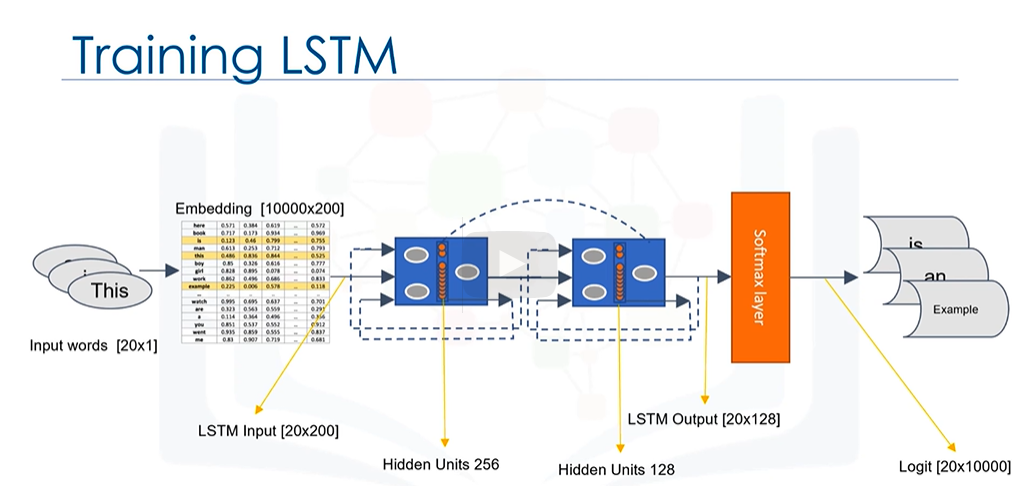

<h2>Applying Recurrent Neural Networks/LSTM for Language Modeling</h2>
In this notebook, we will go over the topic of Language Modelling, and create a Recurrent Neural Network model based on the Long Short-Term Memory unit to train and benchmark on the Penn Treebank dataset. By the end of this notebook, you should be able to understand how TensorFlow builds and executes a RNN model for Language Modelling.


<h2>The Objective</h2>
By now, you should have an understanding of how Recurrent Networks work -- a specialized model to process sequential data by keeping track of the "state" or context. In this notebook, we go over a TensorFlow code snippet for creating a model focused on <b>Language Modelling</b> -- a very relevant task that is the cornerstone of many different linguistic problems such as <b>Speech Recognition, Machine Translation and Image Captioning</b>. For this, we will be using the Penn Treebank dataset, which is an often-used dataset for benchmarking Language Modelling models.


<h3>Objectives<h3>    
<h5> 1. What exactly is Language Modelling? </h5>
<h5> 2. Work Embedding. </h5>
<h5> 3. Applying Recurrent Neural Networks to Text Processing. </h5>
<h5> 4. Building the LSTM model for Language Modeling. </h5>     


<h2>Table of Contents</h2>
<ol>
    <li><a href="#language_modelling">What exactly is Language Modelling?</a></li>
    <li><a href="#treebank_dataset">The Penn Treebank dataset</a></li>
    <li><a href="#word_embedding">Word Embedding</a></li>
    <li><a href="#building_lstm_model">Building the LSTM model for Language Modeling</a></li>
    <li><a href="#ltsm">LTSM</a></li>
</ol>
<p></p>
</div>
<br>


<a id="language_modelling"></a>

<h2>What exactly is Language Modelling?</h2>
Language Modelling, to put it simply, <b>is the task of assigning probabilities to sequences of words</b>. This means that, given a context of one or a sequence of words in the language the model was trained on, the model should provide the next most probable words or sequence of words that follows from the given sequence of words the sentence. Language Modelling is one of the most important tasks in Natural Language Processing.

<img src="https://ibm.box.com/shared/static/1d1i5gub6wljby2vani2vzxp0xsph702.png" width="1080">
<center><i>Example of a sentence being predicted</i></center>
<br><br>
In this example, one can see the predictions for the next word of a sentence, given the context "This is an". As you can see, this boils down to a sequential data analysis task -- you are given a word or a sequence of words (the input data), and, given the context (the state), you need to find out what is the next word (the prediction). This kind of analysis is very important for language-related tasks such as <b>Speech Recognition, Machine Translation, Image Captioning, Text Correction</b> and many other very relevant problems. 

<img src="https://ibm.box.com/shared/static/az39idf9ipfdpc5ugifpgxnydelhyf3i.png" width="1080">
<center><i>The above example is a schema of an RNN in execution</i></center>
<br><br>
As the above image shows, Recurrent Network models fit this problem like a glove. Alongside LSTM and its capacity to maintain the model's state for over one thousand time steps, we have all the tools we need to undertake this problem. The goal for this notebook is to create a model that can reach <b>low levels of perplexity</b> on our desired dataset.

For Language Modelling problems, <b>perplexity</b> is the way to gauge efficiency. Perplexity is simply a measure of how well a probabilistic model is able to predict its sample. A higher-level way to explain this would be saying that <b>low perplexity means a higher degree of trust in the predictions the model makes</b>. Therefore, the lower perplexity is, the better.


<a id="treebank_dataset"></a>

<h2>The Penn Treebank dataset</h2>
Historically, datasets big enough for Natural Language Processing are hard to come by. This is in part due to the necessity of the sentences to be broken down and tagged with a certain degree of correctness -- or else the models trained on it won't be able to be correct at all. This means that we need a <b>large amount of data, annotated by or at least corrected by humans</b>. This is, of course, not an easy task at all.

The Penn Treebank, or PTB for short, is a dataset maintained by the University of Pennsylvania. It is <i>huge</i> -- there are over <b>four million and eight hundred thousand</b> annotated words in it, all corrected by humans. It is composed of many different sources, from abstracts of Department of Energy papers to texts from the Library of America. Since it is verifiably correct and of such a huge size, the Penn Treebank is commonly used as a benchmark dataset for Language Modelling.

The dataset is divided in different kinds of annotations, such as Piece-of-Speech, Syntactic and Semantic skeletons. For this example, we will simply use a sample of clean, non-annotated words (with the exception of one tag --<code>&lt;unk></code>
, which is used for rare words such as uncommon proper nouns) for our model. This means that we just want to predict what the next words would be, not what they mean in context or their classes on a given sentence.

<center>Example of text from the dataset we are going to use, <b>ptb.train</b></center>
<br><br>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <center>the percentage of lung cancer deaths among the workers at the west <code>&lt;unk&gt;</code> mass. paper factory appears to be the highest for any asbestos workers studied in western industrialized countries he said 
 the plant which is owned by <code>&lt;unk&gt;</code> & <code>&lt;unk&gt;</code> co. was under contract with <code>&lt;unk&gt;</code> to make the cigarette filters 
 the finding probably will support those who argue that the U.S. should regulate the class of asbestos including <code>&lt;unk&gt;</code> more <code>&lt;unk&gt;</code> than the common kind of asbestos <code>&lt;unk&gt;</code> found in most schools and other buildings dr. <code>&lt;unk&gt;</code> said</center>
</div>


<a id="word_embedding"></a>

<h2>Word Embeddings</h2><br/>

For better processing, in this example, we will make use of <a href="https://www.tensorflow.org/tutorials/word2vec/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2022-01-01"><b>word embeddings</b></a>, which is <b>a way of representing sentence structures or words as n-dimensional vectors (where n is a reasonably high number, such as 200 or 500) of real numbers</b>. Basically, we will assign each word a randomly-initialized vector, and input those into the network to be processed. After a number of iterations, these vectors are expected to assume values that help the network to correctly predict what it needs to -- in our case, the probable next word in the sentence. This is shown to be a very effective task in Natural Language Processing, and is a commonplace practice.
<br><br>
<font size="4"><strong>
$$Vec("Example") = [0.02, 0.00, 0.00, 0.92, 0.30, \ldots]$$
</strong></font>
<br>
Word Embedding tends to group up similarly used words <i>reasonably</i> close together in the vectorial space. For example, if we use T-SNE (a dimensional reduction visualization algorithm) to flatten the dimensions of our vectors into a 2-dimensional space and plot these words in a 2-dimensional space, we might see something like this:

<img src="https://ibm.box.com/shared/static/bqhc5dg879gcoabzhxra1w8rkg3od1cu.png" width="800">
<center><i>T-SNE Mockup with clusters marked for easier visualization</i></center>
<br><br>
As you can see, words that are frequently used together, in place of each other, or in the same places as them tend to be grouped together -- being closer together the higher they are correlated. For example, "None" is pretty semantically close to "Zero", while a phrase that uses "Italy", you could probably also fit "Germany" in it, with little damage to the sentence structure. The vectorial "closeness" for similar words like this is a great indicator of a well-built model.

<hr>
 


We need to import the necessary modules for our code. We need <b><code>numpy</code></b> and <b><code>tensorflow</code></b>, obviously. Additionally, we can import directly the <b><code>tensorflow.models.rnn</code></b> model, which includes the function for building RNNs, and <b><code>tensorflow.models.rnn.ptb.reader</code></b> which is the helper module for getting the input data from the dataset we just downloaded.

If you want to learn more take a look at <https://github.com/tensorflow/models/blob/master/tutorials/rnn/ptb/reader.py>


<a id="building_lstm_model"></a>

<h2>Building the LSTM model for Language Modeling</h2>
Now that we know exactly what we are doing, we can start building our model using TensorFlow. The very first thing we need to do is download and extract the <code>simple-examples</code> dataset, which can be done by executing the code cell below.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import time, os, collections
import tensorflow as tf


In [2]:
def read_words(filename):
    with open(filename, "r", encoding="utf-8", errors="replace") as f:
        return f.read().replace("\n", "<eos>").split()

In [3]:
def build_vocab(filename):
    data = read_words(filename)
    counter = collections.Counter(data)
    count_pairs = sorted(counter.items(), key=lambda x: (-x[1], x[0]))
    words, _ = zip(*count_pairs)
    word_to_id = {word: i for i, word in enumerate(words)}
    return word_to_id

In [4]:
def file_to_word_ids(filename, word_to_id):
    data = read_words(filename)
    return [word_to_id[word] for word in data if word in word_to_id]

In [5]:
train_path = r"C:\Users\fredr\OneDrive\Desktop\Git-Ronaldo\data\ptb\ptb.train.txt"
valid_path = r"C:\Users\fredr\OneDrive\Desktop\Git-Ronaldo\data\ptb\ptb.valid.txt"
test_path= r"C:\Users\fredr\OneDrive\Desktop\Git-Ronaldo\data\ptb\ptb.test.txt"
train_path, valid_path, test_path

('C:\\Users\\fredr\\OneDrive\\Desktop\\Git-Ronaldo\\data\\ptb\\ptb.train.txt',
 'C:\\Users\\fredr\\OneDrive\\Desktop\\Git-Ronaldo\\data\\ptb\\ptb.valid.txt',
 'C:\\Users\\fredr\\OneDrive\\Desktop\\Git-Ronaldo\\data\\ptb\\ptb.test.txt')

In [6]:
def load_ptb_dataset():
    
    word_to_id = build_vocab(train_path)

    train_data = file_to_word_ids(train_path, word_to_id)
    valid_data = file_to_word_ids(valid_path, word_to_id)
    test_data = file_to_word_ids(test_path, word_to_id)
    vocab_size = len(word_to_id)

    return train_data, valid_data, test_data, vocab_size, word_to_id

train_data, valid_data, test_data, vocab_size, word_to_id = load_ptb_dataset()

In [7]:
# train_data

In [8]:
print(f"Vocabulary size: {vocab_size}",f"Train data size: {len(train_data)}",
f"Valid data size: {len(valid_data)}", f"Test data size: {len(test_data)}")
print(f"\n\nSample word to id mapping: {list(word_to_id.items())[:5]}")

Vocabulary size: 10000 Train data size: 929589 Valid data size: 73759 Test data size: 82429


Sample word to id mapping: [('the', 0), ('<unk>', 1), ('<eos>', 2), ('N', 3), ('of', 4)]


In [9]:
def id_to_word(id_list, word_to_id=word_to_id):
    id_to_word_dict = {v: k for k, v in word_to_id.items()}
    return [id_to_word_dict[id_] for id_ in id_list]

print(id_to_word(train_data[0:100]))

['aer', 'banknote', 'berlitz', 'calloway', 'centrust', 'cluett', 'fromstein', 'gitano', 'guterman', 'hydro-quebec', 'ipo', 'kia', 'memotec', 'mlx', 'nahb', 'punts', 'rake', 'regatta', 'rubens', 'sim', 'snack-food', 'ssangyong', 'swapo', 'wachter', '<eos>', 'pierre', '<unk>', 'N', 'years', 'old', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'nov.', 'N', '<eos>', 'mr.', '<unk>', 'is', 'chairman', 'of', '<unk>', 'n.v.', 'the', 'dutch', 'publishing', 'group', '<eos>', 'rudolph', '<unk>', 'N', 'years', 'old', 'and', 'former', 'chairman', 'of', 'consolidated', 'gold', 'fields', 'plc', 'was', 'named', 'a', 'nonexecutive', 'director', 'of', 'this', 'british', 'industrial', 'conglomerate', '<eos>', 'a', 'form', 'of', 'asbestos', 'once', 'used', 'to', 'make', 'kent', 'cigarette', 'filters', 'has', 'caused', 'a', 'high', 'percentage', 'of', 'cancer', 'deaths', 'among', 'a', 'group', 'of']


In [10]:
print(train_data[0:100])

[9970, 9971, 9972, 9974, 9975, 9976, 9980, 9981, 9982, 9983, 9984, 9986, 9987, 9988, 9989, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999, 2, 9256, 1, 3, 72, 393, 33, 2133, 0, 146, 19, 6, 9207, 276, 407, 3, 2, 23, 1, 13, 141, 4, 1, 5465, 0, 3081, 1596, 96, 2, 7682, 1, 3, 72, 393, 8, 337, 141, 4, 2477, 657, 2170, 955, 24, 521, 6, 9207, 276, 4, 39, 303, 438, 3684, 2, 6, 942, 4, 3150, 496, 263, 5, 138, 6092, 4241, 6036, 30, 988, 6, 241, 760, 4, 1015, 2786, 211, 6, 96, 4]


In [11]:
def ptb_iterator(raw_data, batch_size, num_steps):
    data_length = len(raw_data)
    batch_length = data_length // batch_size
    print(batch_size, batch_length)
    data = np.reshape(raw_data[0 : batch_size * batch_length], [batch_size, batch_length])
    print(data)
    
    epoch_size = (batch_length - 1) // num_steps
    
    for i in range(epoch_size):
        x = data[:, i * num_steps:(i + 1) * num_steps]
        y = data[:, i * num_steps + 1:(i + 1) * num_steps + 1]
        yield (x, y)

In [12]:
batch_size=30
num_steps=20

iteration = ptb_iterator(train_data, batch_size, num_steps)
tupl = iteration.__next__()
input_data =tupl[0]
targets = tupl[1]

30 30986
[[9970 9971 9972 ...  173  145   79]
 [2654    6  334 ...  997  443    2]
 [   0 1071    4 ...  162 7409   43]
 ...
 [  47 4447 1431 ... 6613    2    7]
 [  31 3374    4 ...  673 8234   30]
 [  59 2070 2433 ... 9536    9 2229]]


In [13]:
input_data.shape, targets.shape

((30, 20), (30, 20))

In [14]:
print(id_to_word(input_data[0,:]))

['aer', 'banknote', 'berlitz', 'calloway', 'centrust', 'cluett', 'fromstein', 'gitano', 'guterman', 'hydro-quebec', 'ipo', 'kia', 'memotec', 'mlx', 'nahb', 'punts', 'rake', 'regatta', 'rubens', 'sim']


In [15]:
print(id_to_word(targets[0,:]))

['banknote', 'berlitz', 'calloway', 'centrust', 'cluett', 'fromstein', 'gitano', 'guterman', 'hydro-quebec', 'ipo', 'kia', 'memotec', 'mlx', 'nahb', 'punts', 'rake', 'regatta', 'rubens', 'sim', 'snack-food']


In [16]:
 # Creating the input structure for our RNN #
        ############################################
        # Input structure is 20x[30x200]
        # Considering each word is represended by a 200 dimentional vector, and we have 30 batchs, we create 30 word-vectors of size [30xx2000]
        # The input structure is fed from the embeddings, which are filled in by the input data
        # Feeding a batch of b sentences to a RNN:
        # In step 1,  first word of each of the b sentences (in a batch) is input in parallel.  
        # In step 2,  second word of each of the b sentences is input in parallel. 
        # The parallelism is only for efficiency.  
        # Each sentence in a batch is handled in parallel, but the network sees one word of a sentence at a time and does the computations accordingly. 
        # All the computations involving the words of all sentences in a batch at a given time step are done in parallel. 

        ########################################################################################################
        # Instantiating our RNN model and setting stateful to True to feed forward the state to the next layer #
        ########################################################################################################
        

In [17]:
embedding = tf.keras.layers.Embedding(input_dim=10000,
                                      output_dim=200,
                                    #   input_length=20, #20
                                      trainable=True,
                                      name="embedding")
embedding

<Embedding name=embedding, built=False>

In [18]:
inputs = embedding(input_data)
inputs

<tf.Tensor: shape=(30, 20, 200), dtype=float32, numpy=
array([[[ 0.04081288,  0.01707898,  0.03941515, ..., -0.03489934,
          0.01899899,  0.03567762],
        [-0.03982605,  0.03032616,  0.01559789, ...,  0.04315163,
          0.04299612,  0.04414708],
        [-0.00034875,  0.01753457, -0.04807318, ..., -0.01502637,
         -0.02057674, -0.01292548],
        ...,
        [ 0.01543118,  0.04418224,  0.01879856, ..., -0.03054684,
         -0.00546306, -0.04561542],
        [-0.00140982, -0.04340507, -0.00774843, ..., -0.00834759,
         -0.02460518,  0.038737  ],
        [ 0.02428954, -0.038013  ,  0.03826765, ..., -0.00518202,
          0.04088714, -0.0059488 ]],

       [[ 0.03054008, -0.00851523, -0.01340298, ..., -0.01374809,
          0.01185228,  0.02145899],
        [ 0.00968857,  0.00541221, -0.00543475, ..., -0.02940798,
         -0.02709205, -0.0369878 ],
        [ 0.02840151,  0.00981419, -0.03484012, ..., -0.03611307,
         -0.03677554,  0.00196242],
        ...,

In [19]:
cell1 = tf.keras.layers.LSTMCell(256)
cell2 = tf.keras.layers.LSTMCell(128)
stack = tf.keras.layers.StackedRNNCells([cell1, cell2]) #hidden layers

In [20]:
rnn = tf.keras.layers.RNN(stack,
                          [batch_size, num_steps],
                          return_state=False,
                          stateful=True,
                          trainable=True)

In [21]:
initial = tf.Variable(tf.zeros([batch_size, 200]), trainable=False)
initial

<tf.Variable 'Variable:0' shape=(30, 200) dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [22]:
rnn.initial_state = initial

In [23]:
outputs = rnn(inputs)
outputs.shape

TensorShape([30, 20, 128])

In [24]:
inputs[0]

<tf.Tensor: shape=(20, 200), dtype=float32, numpy=
array([[ 0.04081288,  0.01707898,  0.03941515, ..., -0.03489934,
         0.01899899,  0.03567762],
       [-0.03982605,  0.03032616,  0.01559789, ...,  0.04315163,
         0.04299612,  0.04414708],
       [-0.00034875,  0.01753457, -0.04807318, ..., -0.01502637,
        -0.02057674, -0.01292548],
       ...,
       [ 0.01543118,  0.04418224,  0.01879856, ..., -0.03054684,
        -0.00546306, -0.04561542],
       [-0.00140982, -0.04340507, -0.00774843, ..., -0.00834759,
        -0.02460518,  0.038737  ],
       [ 0.02428954, -0.038013  ,  0.03826765, ..., -0.00518202,
         0.04088714, -0.0059488 ]], dtype=float32)>

In [25]:
outputs[0]

<tf.Tensor: shape=(20, 128), dtype=float32, numpy=
array([[-1.6380502e-04,  3.5012467e-04,  1.4963722e-03, ...,
         4.1042277e-04,  1.3074952e-03,  4.4465117e-04],
       [-4.9561099e-04,  2.1192011e-04,  3.4680704e-03, ...,
        -2.4882946e-04,  1.3833983e-03, -8.4886524e-06],
       [-1.4815124e-03,  1.1546534e-03,  3.7568798e-03, ...,
        -5.3578976e-04,  2.2363144e-03,  1.4307705e-05],
       ...,
       [-6.6506970e-03, -7.1859639e-04, -2.7121506e-03, ...,
        -3.8633472e-03,  3.9285077e-03, -8.1258612e-03],
       [-4.3823458e-03, -1.9755990e-03, -3.7997421e-03, ...,
        -3.3480194e-03,  2.5776541e-03, -6.6822339e-03],
       [-2.7544948e-03, -2.9332675e-03, -6.2481551e-03, ...,
        -2.4162503e-03,  2.9283504e-03, -5.1500639e-03]], dtype=float32)>

In [26]:
dense = tf.keras.layers.Dense(vocab_size)

In [27]:
logits_outputs  = dense(outputs)
print(logits_outputs.shape, (batch_size, num_steps, vocab_size))
assert logits_outputs.shape == (batch_size, num_steps, vocab_size)

(30, 20, 10000) (30, 20, 10000)


In [28]:
activation = tf.keras.layers.Activation('softmax')
activation

<Activation name=activation, built=False>

In [29]:
output_words_probabilities = activation(logits_outputs)
output_words_probabilities.shape

TensorShape([30, 20, 10000])

In [30]:
print(np.argmax(output_words_probabilities[0, 0:num_steps], axis=1)) #prediction
print(targets[0])

[8944 8944 8080 8080 8080 8554 8554 9707 9707 9229 7531 5869 5869 5869
 5869 5869 6447 6447 4090 4090]
[9971 9972 9974 9975 9976 9980 9981 9982 9983 9984 9986 9987 9988 9989
 9991 9992 9993 9994 9995 9996]


In [31]:
def crossentropy(y_true, y_pred):
    return tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)

In [32]:
learning_rate = 0.1

In [33]:
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, clipnorm=5)

In [34]:
model = tf.keras.Sequential()
model.add(embedding)
model.add(rnn)
model.add(dense)
model.add(activation)
model.compile(loss=crossentropy, optimizer=optimizer)
model.build(input_shape=(batch_size, num_steps))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (30, 20, 200)          │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn (RNN)                       │ (30, 20, 128)          │       665,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (30, 20, 10000)        │     1,290,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (30, 20, 10000)        │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,955,088 (15.09 MB)

 Trainable params: 3,955,088 (15.09 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
trainable_variables = model.trainable_variables
trainable_variables

[<KerasVariable shape=(10000, 200), dtype=float32, path=embedding/embeddings>,
 <KerasVariable shape=(200, 1024), dtype=float32, path=rnn/stacked_rnn_cells/lstm_cell/kernel>,
 <KerasVariable shape=(256, 1024), dtype=float32, path=rnn/stacked_rnn_cells/lstm_cell/recurrent_kernel>,
 <KerasVariable shape=(1024,), dtype=float32, path=rnn/stacked_rnn_cells/lstm_cell/bias>,
 <KerasVariable shape=(256, 512), dtype=float32, path=rnn/stacked_rnn_cells/lstm_cell_1/kernel>,
 <KerasVariable shape=(128, 512), dtype=float32, path=rnn/stacked_rnn_cells/lstm_cell_1/recurrent_kernel>,
 <KerasVariable shape=(512,), dtype=float32, path=rnn/stacked_rnn_cells/lstm_cell_1/bias>,
 <KerasVariable shape=(128, 10000), dtype=float32, path=dense/kernel>,
 <KerasVariable shape=(10000,), dtype=float32, path=dense/bias>]

In [36]:
def train_test(input_data, targets, learning_rate, training=True):

    if training:
        trainable_variables = model.trainable_variables
        with tf.GradientTape() as tape:
            output_words_probabilities = model(input_data)
            loss = crossentropy(targets, output_words_probabilities)
            cost = tf.reduce_sum(loss / batch_size)
            
        gradient_tape_list = tape.gradient(cost, trainable_variables)
        gradients, _ = tf.clip_by_global_norm(gradient_tape_list, clip_norm=5.0)

        optimizer.apply_gradients(zip(gradients, trainable_variables))
    
    else:
        output_words_probabilities = model(input_data)
        loss = crossentropy(targets, output_words_probabilities)
        cost = tf.reduce_sum(loss / batch_size)

    return cost

With that, the actual structure of our Recurrent Neural Network with Long Short-Term Memory is finished. What remains for us to do is to actually create the methods to run through time -- that is, the <code>run_epoch</code> method to be run at each epoch and a <code>main</code> script which ties all of this together.

What our <code>run_epoch</code> method should do is take our input data and feed it to the relevant operations. This will return at the very least the current result for the cost function.


In [37]:
def one_epoch(data, learning_rate, training_set=True, verbose=False):

    start_time = time.time()
    epoch_size = ((len(data) // batch_size) - 1) // num_steps

    costs, iteration = 0, 0.0

    initial.assign(tf.zeros([batch_size, 200])) 

    for step, (x, y) in enumerate(ptb_iterator(data, batch_size, num_steps)):
        if training_set:
            loss = train_test(x, y, learning_rate)
        else:
            loss = train_test(x, y, learning_rate, training=False)

        costs += loss
        iteration += num_steps
        speed = iteration * batch_size / (time.time() - start_time)

        if verbose and step % (epoch_size // 10) == 10:
            print(f"Iteration {step} of {epoch_size}, perplexity: {np.exp(costs / iteration):.3f}, speed: {speed:.0f} of words / second")

    return np.exp(costs / iteration)

In [38]:
# learning_rate = 0.1
decay = 0.5
epochs_drop = 1

In [39]:
for i in range(5): #max epoch
    
    model.optimizer.learning_rate = learning_rate
    
    learning_decay_rate = decay ** (i // epochs_drop)
    learning_rate = learning_rate * learning_decay_rate
    
    print(f"Epoch {i + 1} - Learning Rate: {learning_rate:.6f}")
    
    train_perplexity = one_epoch(train_data, learning_rate=learning_rate, training_set=True, verbose=True,)
    
    print(f"Epoch {i+1} : Train Perplexity: {train_perplexity:.3f}")

    valid_perplexity = one_epoch(valid_data, learning_rate=learning_rate, training_set=False)
    
    print(f"Epoch {i+1} : Valid Perplexity: {valid_perplexity:.3f}")
    
test_perplexity = one_epoch(test_data, learning_rate=learning_rate, training_set=False)

print("Test Perplexity: %.3f" % test_perplexity)

Epoch 1 - Learning Rate: 0.100000
30 30986
[[9970 9971 9972 ...  173  145   79]
 [2654    6  334 ...  997  443    2]
 [   0 1071    4 ...  162 7409   43]
 ...
 [  47 4447 1431 ... 6613    2    7]
 [  31 3374    4 ...  673 8234   30]
 [  59 2070 2433 ... 9536    9 2229]]
Iteration 10 of 1549, perplexity: 8388.848, speed: 1126 of words / second
Iteration 164 of 1549, perplexity: 1113.959, speed: 1315 of words / second
Iteration 318 of 1549, perplexity: 946.197, speed: 1273 of words / second
Iteration 472 of 1549, perplexity: 880.467, speed: 1134 of words / second
Iteration 626 of 1549, perplexity: 840.585, speed: 1205 of words / second
Iteration 780 of 1549, perplexity: 819.633, speed: 1208 of words / second
Iteration 934 of 1549, perplexity: 802.753, speed: 1229 of words / second
Iteration 1088 of 1549, perplexity: 793.266, speed: 1274 of words / second
Iteration 1242 of 1549, perplexity: 784.716, speed: 1279 of words / second
Iteration 1396 of 1549, perplexity: 770.672, speed: 1296 of 

# Validate a Model

In [58]:
def predict_next_words(input_text, model, word_to_id, id_to_word, num_words=10):
    # Tokenize input text to word IDs
    input_tokens = input_text.lower().split()  # Split input text into tokens
    input_ids = [word_to_id.get(token, 0) for token in input_tokens]  # Convert tokens to IDs
    
    # Prepare input tensor
    input_ids = np.array(input_ids).reshape(1, -1)  # Reshape for model input (batch_size=1)
    
    # Forward pass through the model
    logits = model(input_ids)  # Get logits for next word
    
    # Apply softmax activation
    probs = tf.nn.softmax(logits, axis=-1).numpy()  # Convert logits to probabilities
    
    # Get the top-k words
    top_k_indices = np.argsort(probs[0, -1, :])[::-1][:num_words]  # Top-k indices of highest probabilities
    top_k_words = [id_to_word[idx] for idx in top_k_indices]  # Convert indices to words
    
    return top_k_words, probs[0, -1, top_k_indices]

# Assuming id_to_word should be the inverse of word_to_id
id_to_word = {v: k for k, v in word_to_id.items()}

# Example usage:
input_text = "Who are"
num_words_to_predict = 10

predicted_words, probabilities = predict_next_words(input_text, model, word_to_id, id_to_word, num_words=num_words_to_predict)

print(f"Input Text: '{input_text}'")
print("Predicted Next Words:")
for word, prob in zip(predicted_words, probabilities):
    print(f"- {word} (Probability: {prob:.4f})")


Input Text: 'Who are'
Predicted Next Words:
- <unk> (Probability: 0.0001)
- a (Probability: 0.0001)
- n't (Probability: 0.0001)
- <eos> (Probability: 0.0001)
- the (Probability: 0.0001)
- been (Probability: 0.0001)
- to (Probability: 0.0001)
- in (Probability: 0.0001)
- and (Probability: 0.0001)
- an (Probability: 0.0001)
